# Validación de hipótesis

Revisando algunos los pokemon de tipo Normal del dataset algo llamo mi anteción:

<center>
<img src="dataset/example_hp.png" width="850" height="280">
</center>

Tal y como se ve en la imagen me empece a percatar de que existian diferecias entre la caracteristica 'HP' entre los distintos pokemon de las 4 generaciones y esto me planteo unas interrogantes:

<center> 1- Son los pokemon de tipo normal de alguna alguna generacion superiores a los de otra generacion en terminos de HP ?</center>
<center> 2- La diferencias que se llegan a observar (como por ejemplo en la imagen) son producto de azar o son estadisticamente significativas ?</center>

Para dar repuestas a estas voy a realizar las siguientes pruebas:

In [2]:
# Importamos las librerias necesarias y creamos el dataframe
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


df_pkmn = pd.read_csv("dataset/pkmn_exploratory.csv")

Primeramente es necesario saber el promedio de la estadistica 'HP' de los pokemon normales en las 4 generaciones 

In [3]:
generations = [1, 2, 3, 4]

for gen in generations:
    # Filtrar para la generación actual
    current_gen_df = df_pkmn[df_pkmn['Generation'] == gen]

    # Filtrar Pokémon de tipo Normal (Type 1 o Type 2)
    normal_type_pokemon = current_gen_df[(current_gen_df['Type 1'] == 'Normal') | (current_gen_df['Type 2'] == 'Normal')]

    # Cantidad de Pokémon de tipo Normal
    cantidad_normal_gen = len(normal_type_pokemon)

    # Promedio de HP para estos Pokémon
    promedio_hp_gen = normal_type_pokemon['HP'].mean()

    print(f"La cantidad de pokemon de Type 1 o Type 2 que son Normal de la generation {gen} son {cantidad_normal_gen} y su promedio de HP es {promedio_hp_gen:.2f}")


La cantidad de pokemon de Type 1 o Type 2 que son Normal de la generation 1 son 22 y su promedio de HP es 78.68
La cantidad de pokemon de Type 1 o Type 2 que son Normal de la generation 2 son 15 y su promedio de HP es 87.20
La cantidad de pokemon de Type 1 o Type 2 que son Normal de la generation 3 son 18 y su promedio de HP es 68.67
La cantidad de pokemon de Type 1 o Type 2 que son Normal de la generation 4 son 17 y su promedio de HP es 80.53


Viendo el resultado anterior a simple vista parece que hay diferencias pero, si quiero saber si estas son estadisticamente significativas hay que realizar un analisis de varianza pero antes de realizar el mismo hay que comprobar que se cumplen los requisitos matematicos para realizar el mismo

In [4]:
# Filtramos y obtener los datos de HP para Pokémon de tipo Normal por generación
hp_gen1 = df_pkmn[
    ((df_pkmn['Type 1'] == 'Normal') | (df_pkmn['Type 2'] == 'Normal')) &
    (df_pkmn['Generation'] == 1)
]['HP']

hp_gen2 = df_pkmn[
    ((df_pkmn['Type 1'] == 'Normal') | (df_pkmn['Type 2'] == 'Normal')) &
    (df_pkmn['Generation'] == 2)
]['HP']

hp_gen3 = df_pkmn[
    ((df_pkmn['Type 1'] == 'Normal') | (df_pkmn['Type 2'] == 'Normal')) &
    (df_pkmn['Generation'] == 3)
]['HP']

hp_gen4 = df_pkmn[
    ((df_pkmn['Type 1'] == 'Normal') | (df_pkmn['Type 2'] == 'Normal')) &
    (df_pkmn['Generation'] == 4)
]['HP']


📊 Comprobación del Supuesto de Normalidad
---
La normalidad se puede verificar visualmente (histogramas, Q-Q plots) y con pruebas estadísticas.
Usaremos la prueba de Shapiro-Wilk para cada grupo.
(H0: La muestra proviene de una distribución normal. Si p < 0.05, rechazamos H0)

Generación 1:
  Estadístico Shapiro-Wilk: 0.776
  Valor p: 0.000
  ¿Es Normal?: No
  -> Atención: El valor p es menor que 0.05, lo que sugiere que los datos de Generación 1 podrían no ser normales.

Generación 2:
  Estadístico Shapiro-Wilk: 0.656
  Valor p: 0.000
  ¿Es Normal?: No
  -> Atención: El valor p es menor que 0.05, lo que sugiere que los datos de Generación 2 podrían no ser normales.

Generación 3:
  Estadístico Shapiro-Wilk: 0.839
  Valor p: 0.006
  ¿Es Normal?: No
  -> Atención: El valor p es menor que 0.05, lo que sugiere que los datos de Generación 3 podrían no ser normales.

Generación 4:
  Estadístico Shapiro-Wilk: 0.960
  Valor p: 0.639
  ¿Es Normal?: Sí

Realizando visualizaciones de normalidad 

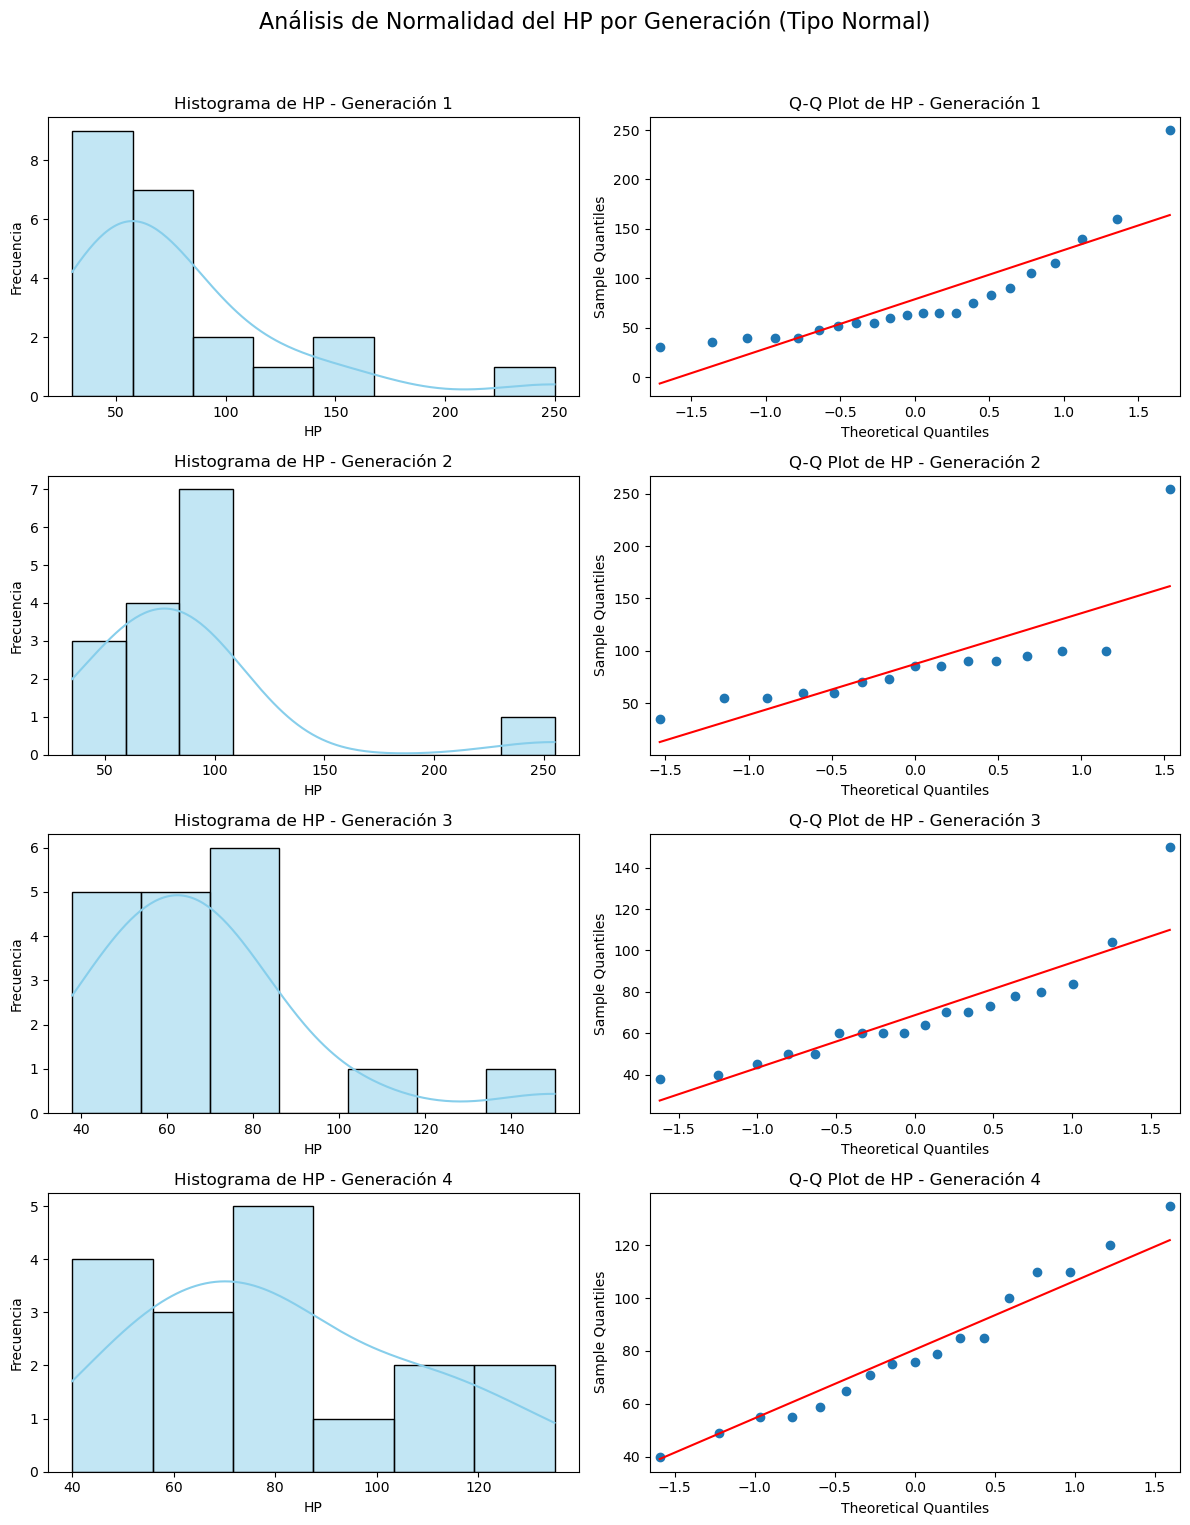



📊 Comprobación del Supuesto de Homocedasticidad
---
Usaremos la prueba de Levene. Es más robusta a la no normalidad que la prueba de Bartlett.
(H0: Las varianzas son iguales en todos los grupos. Si p < 0.05, rechazamos H0)

Estadístico Levene: 0.738
Valor p de Levene: 0.533
-> Las varianzas parecen ser iguales (p >= 0.05). Este supuesto de ANOVA se cumple.


In [8]:
# --- Comprobación del supuesto de Normalidad ---
print("📊 Comprobación del Supuesto de Normalidad")
print("---")
print("La normalidad se puede verificar visualmente (histogramas, Q-Q plots) y con pruebas estadísticas.")
print("Usaremos la prueba de Shapiro-Wilk para cada grupo.")
print("(H0: La muestra proviene de una distribución normal. Si p < 0.05, rechazamos H0)")

# Prueba de Shapiro-Wilk para cada generación
shapiro_results = {}
for i, data in enumerate([hp_gen1, hp_gen2, hp_gen3, hp_gen4]):
    # Verificar si el grupo tiene suficientes datos (Shapiro-Wilk requiere al menos 3 datos)
    if len(data) >= 3:
        stat, p = stats.shapiro(data)
        shapiro_results[f'Generación {i+1}'] = {'Estadístico': stat, 'Valor p': p, 'Normal?': 'Sí' if p >= 0.05 else 'No'}
    else:
        shapiro_results[f'Generación {i+1}'] = {'Estadístico': 'N/A (datos insuficientes)', 'Valor p': 'N/A', 'Normal?': 'N/A'}

for gen, res in shapiro_results.items():
    print(f"\n{gen}:")
    print(f"  Estadístico Shapiro-Wilk: {res['Estadístico']:.3f}" if isinstance(res['Estadístico'], float) else f"  Estadístico Shapiro-Wilk: {res['Estadístico']}")
    print(f"  Valor p: {res['Valor p']:.3f}" if isinstance(res['Valor p'], float) else f"  Valor p: {res['Valor p']}")
    print(f"  ¿Es Normal?: {res['Normal?']}")
    if isinstance(res['Valor p'], float) and res['Valor p'] < 0.05:
        print(f"  -> Atención: El valor p es menor que 0.05, lo que sugiere que los datos de {gen} podrían no ser normales.")


# Visualización con Histogramas y Q-Q plots (opcional, pero muy recomendable)
print("\nRealizando visualizaciones de normalidad (histogramas y Q-Q plots)...")

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Análisis de Normalidad del HP por Generación (Tipo Normal)', fontsize=16)

data_groups = {
    'Generación 1': hp_gen1,
    'Generación 2': hp_gen2,
    'Generación 3': hp_gen3,
    'Generación 4': hp_gen4
}

for i, (gen_name, data) in enumerate(data_groups.items()):
    # Histograma
    sns.histplot(data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histograma de HP - {gen_name}')
    axes[i, 0].set_xlabel('HP')
    axes[i, 0].set_ylabel('Frecuencia')

    # Q-Q Plot
    sm.qqplot(data, line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot de HP - {gen_name}')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# --- Comprobación del supuesto de Homocedasticidad (Igualdad de Varianzas) ---
print("\n\n📊 Comprobación del Supuesto de Homocedasticidad")
print("---")
print("Usaremos la prueba de Levene. Es más robusta a la no normalidad que la prueba de Bartlett.")
print("(H0: Las varianzas son iguales en todos los grupos. Si p < 0.05, rechazamos H0)")

# Prueba de Levene
# Excluir grupos con datos insuficientes si aplica
data_for_levene = [data for data in [hp_gen1, hp_gen2, hp_gen3, hp_gen4] if len(data) >= 2] # Levene requiere al menos 2 datos por grupo

if len(data_for_levene) >= 2: # Se necesitan al menos 2 grupos para Levene
    stat_levene, p_levene = stats.levene(*data_for_levene)
    print(f"\nEstadístico Levene: {stat_levene:.3f}")
    print(f"Valor p de Levene: {p_levene:.3f}")

    if p_levene < 0.05:
        print(f"-> Atención: El valor p de Levene es menor que 0.05. Esto sugiere que las varianzas no son iguales.")
        print("   Si las varianzas no son iguales, considera usar la prueba de Welch ANOVA (si la normalidad se cumple) o la prueba de Kruskal-Wallis (si la normalidad no se cumple).")
    else:
        print(f"-> Las varianzas parecen ser iguales (p >= 0.05). Este supuesto de ANOVA se cumple.")
else:
    print("\nNo hay suficientes grupos con datos para realizar la prueba de Levene.")

### Conclusion de las pruebas

Aunque el supuesto de homocedasticidad se cumple, el supuesto de normalidad parece no cumplirse del todo en los datos, especialmente dado que los tamaños de muestra por generación (22, 15, 18, 17) son relativamente pequeños. ANOVA es robusta a desviaciones leves de la normalidad con muestras grandes (gracias al Teorema del Límite Central), pero con muestras más pequeñas, la violación de la normalidad puede afectar la validez de los resultados de ANOVA.

Es por ello que dado que la normalidad es cuestionable y tus tamaños de muestra no son muy grandes, he decidido hacer la prueba H de Kruskal-Wallis que es la opción más apropiada y robusta para comparar las medianas de HP entre tus cuatro generaciones de Pokémon de tipo Normal. No asume normalidad y es más adecuada para distribuciones que parecen sesgadas o no normales.

## Prueba H de Kruskal-Wallis

Para saber si existen diferencias significativas entre la mediana del HP de los Pokémon de tipo Normal entre las Generaciones 1, 2, 3 y 4 he optado por realizar la Prueba H de Kruskal-Wallis (esta compara los 4 Grupos de HP de Pokémon tipo Normal) y para la misma se han desarrollado estas hipótesis:

* **Hipótesis Nula ($H_0$)**: Las medianas de HP de los Pokémon de tipo Normal son iguales en todas las generaciones. Es decir, no hay diferencia estocástica entre los grupos.

    $$H_0: \text{Mediana}_{\text{Gen1}} = \text{Mediana}_{\text{Gen2}} = \text{Mediana}_{\text{Gen3}} = \text{Mediana}_{\text{Gen4}}$$

* **Hipótesis Alternativa ($H_1$)**: Al menos una de las medianas de HP es diferente de las demás.

    $$H_1: \text{Al menos una } \text{Mediana}_i \text{ es diferente.}$$

In [10]:
# Asegurarse de que no haya grupos vacíos, lo cual causaría un error en Kruskal-Wallis
# Aunque en tu caso parece que siempre hay datos, es buena práctica.
data_groups = [hp_gen1, hp_gen2, hp_gen3, hp_gen4]
valid_groups = [group for group in data_groups if not group.empty]

if len(valid_groups) < 2:
    print("Error: Se necesitan al menos dos grupos con datos para realizar la prueba de Kruskal-Wallis.")
else:
    # Realizar la prueba H de Kruskal-Wallis
    # Se pasan los grupos como argumentos separados
    h_statistic, p_value = stats.kruskal(*valid_groups)

    print(f"Resultado de la Prueba H de Kruskal-Wallis:")
    print(f"Estadístico H: {h_statistic:.3f}")
    print(f"Valor p: {p_value:.3f}")

    alpha = 0.05
    if p_value < alpha:
        print(f"Dado que el valor p ({p_value:.3f}) es menor que el nivel de significancia (alpha={alpha}),")
        print(f"Rechazamos la hipótesis nula.")
        print(f"Hay una diferencia estadísticamente significativa en el HP mediano de los Pokémon de tipo Normal entre al menos dos de las generaciones (1, 2, 3, 4).")
        print(f"Para saber qué generaciones son significativamente diferentes, se necesitarían realizar pruebas post-hoc no paramétricas (ej. Dunn's test).")
    else:
        print(f"Dado que el valor p ({p_value:.3f}) es mayor que el nivel de significancia (alpha={alpha}),")
        print(f"No rechazamos la hipótesis nula.")
        print(f"No hay suficiente evidencia estadística para afirmar que existe una diferencia significativa en el HP mediano de los Pokémon de tipo Normal entre las generaciones.")
        print(f"Las diferencias observadas podrían deberse al azar o ser insignificantes.")


Resultado de la Prueba H de Kruskal-Wallis:
Estadístico H: 3.595
Valor p: 0.309
Dado que el valor p (0.309) es mayor que el nivel de significancia (alpha=0.05),
No rechazamos la hipótesis nula.
No hay suficiente evidencia estadística para afirmar que existe una diferencia significativa en el HP mediano de los Pokémon de tipo Normal entre las generaciones.
Las diferencias observadas podrían deberse al azar o ser insignificantes.


Podemos llegar a la conclusion gracias a las pruebas realizadas que ninguna generacion tiene pokemon de tipo Normal con un HP significativamente mayor a los de las otras generaciones